# Supervised_learning_algorithms_Regression

#### Exercises to practice with regressions.

- Exercise 1
Create at least two different regression models to try to best predict the house price ( MEDV ) in the attached file.



- Exercise 2
Compare them based on MSE and R2.



- Exercise 3
Train them using the different parameters they support to try to improve their prediction.



- Exercise 4
Compare your performance using the traint/test approach or using all data (internal validation).



- Exercise 5
Do not use the number of rooms ( RM ) variable when making predictions.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

## Dataset information:

#### Title: Boston Housing Data

#### Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

#### Past Usage:

 - Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261.
 - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan  Kaufmann.

#### Relevant Information:

Concerns housing values in suburbs of Boston.

#### Number of Instances: 506

#### Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

#### Attribute Information:

- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX       full-value property-tax rate per 10.000 dollars
- PTRATIO   pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEVD    Median value of owner-occupied homes in 1000's dollars

#### Missing Attribute Values:  None.



## Understanding the dataset.

In [3]:
df = pd.read_csv('housing data.csv', sep = ',', header = None )
df.columns = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
             'PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#datatype check
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

       CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.006   18.0   2.31     0  0.538  6.575   65.2   4.090    1  296.0   
1     0.027    0.0   7.07     0  0.469  6.421   78.9   4.967    2  242.0   
2     0.027    0.0   7.07     0  0.469  7.185   61.1   4.967    2  242.0   
3     0.032    0.0   2.18     0  0.458  6.998   45.8   6.062    3  222.0   
4     0.069    0.0   2.18     0  0.458  7.147   54.2   6.062    3  222.0   
5     0.030    0.0   2.18     0  0.458  6.430   58.7   6.062    3  222.0   
6     0.088   12.5   7.87     0  0.524  6.012   66.6   5.561    5  311.0   
7     0.145   12.5   7.87     0  0.524  6.172   96.1   5.950    5  311.0   
8     0.211   12.5   7.87     0  0.524  5.631  100.0   6.082    5  311.0   
9     0.170   12.5   7.87     0  0.524  6.004   85.9   6.592    5  311.0   
10    0.225   12.5   7.87     0  0.524  6.377   94.3   6.347    5  311.0   
11    0.117   12.5   7.87     0  0.524  6.009   82.9   6.227    5  311.0   
12    0.094 

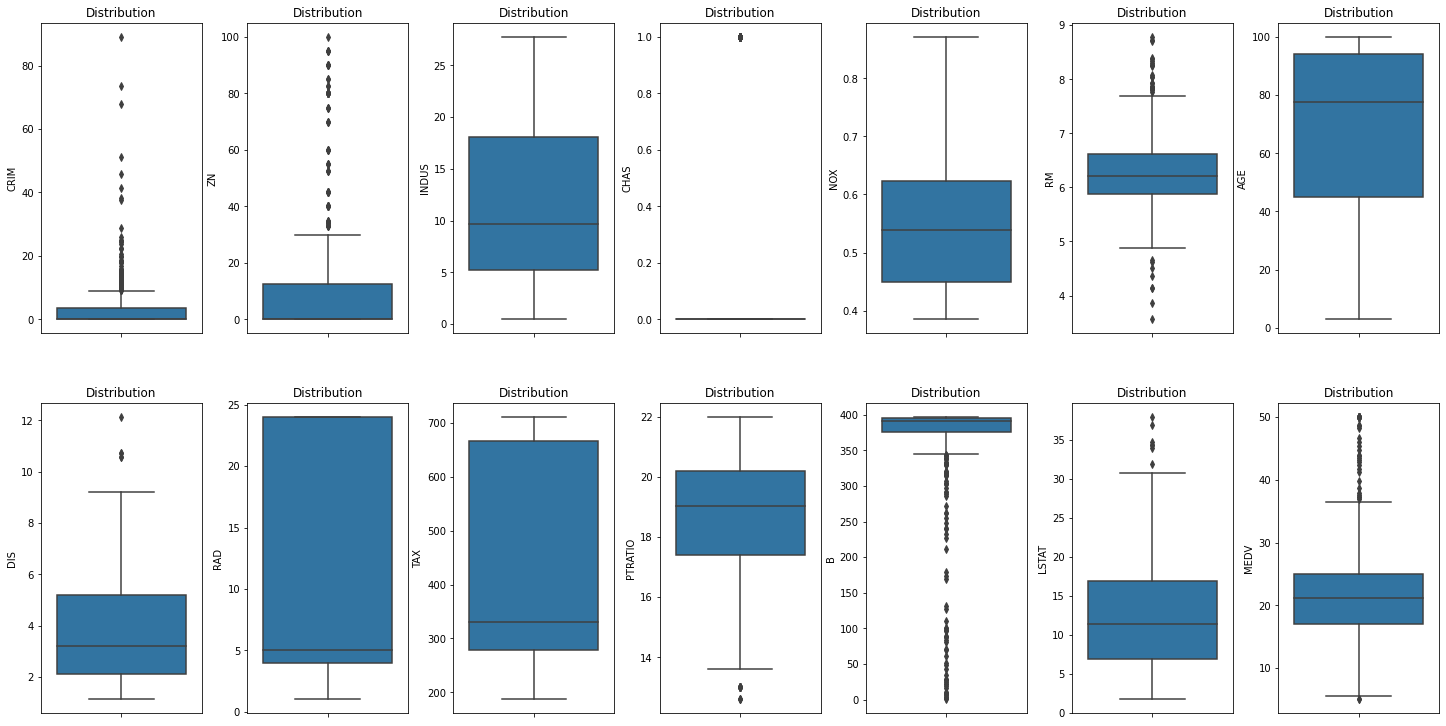

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index]).set(title='Distribution')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

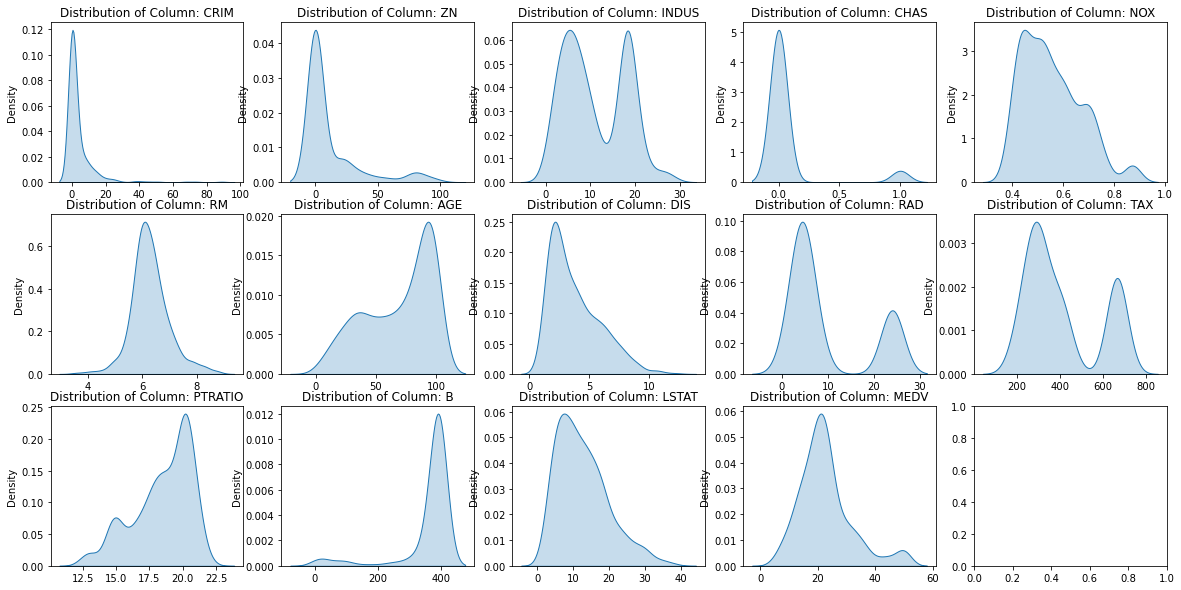

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #df.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df[[col]]  # select the data
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
    
plt.show()

#### Let's plot the pairwise correlation on data:

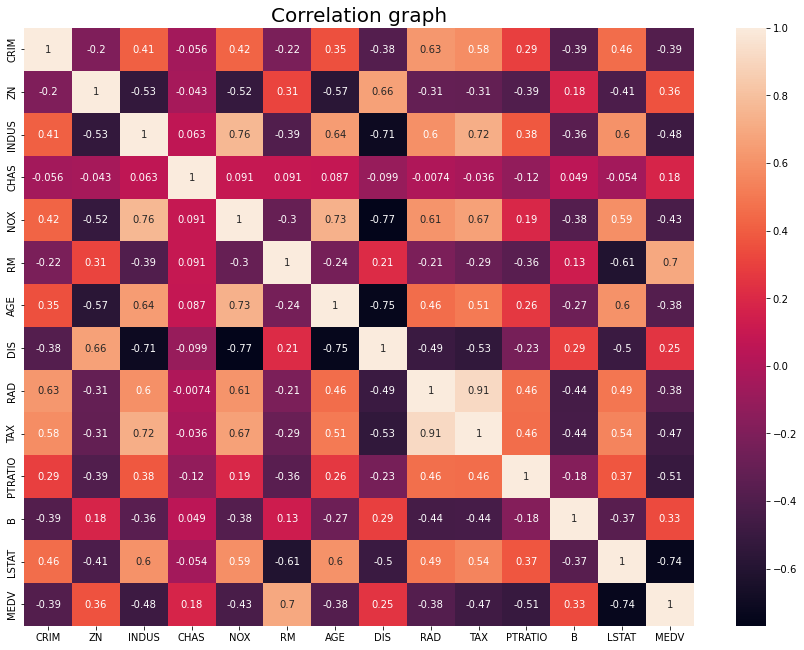

In [8]:
corr = df.corr()
plt.figure(figsize=(15,11))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, annot=True) #annot puts the number of the correlation.
plt.show()

From the correlation graph, we are able to observe the linear correlation between parameters. Based on the above observation, I take RM and LSTAT and PTRATIO are linear correelated.

## Preprocessing


#### Checking for null values:

In [9]:
df.isnull().values.any()

False

In [10]:
df.isna().values.any()

False

#### Let check the distribution of our variables:

In [11]:
from scipy import stats

print('Null hypothesis: H0 : P = x -> Normal distribution')
print('Alternative hypothesis Ha : P /= x -> Not normal distribiuted')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('The variable ', i, "with p-value of ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probably normally distributed')
    else:
        print("Probably NOT normally distributed")

Null hypothesis: H0 : P = x -> Normal distribution
Alternative hypothesis Ha : P /= x -> Not normal distribiuted
The variable  CRIM with p-value of  1.3285517473179391e-36
Probably NOT normally distributed
The variable  ZN with p-value of  7.882576753156324e-34
Probably NOT normally distributed
The variable  INDUS with p-value of  1.0641241829131273e-17
Probably NOT normally distributed
The variable  CHAS with p-value of  2.350467979135232e-40
Probably NOT normally distributed
The variable  NOX with p-value of  5.775580887027246e-14
Probably NOT normally distributed
The variable  RM with p-value of  2.4114604757485836e-10
Probably NOT normally distributed
The variable  AGE with p-value of  2.2305888882906016e-18
Probably NOT normally distributed
The variable  DIS with p-value of  2.1851281171594835e-17
Probably NOT normally distributed
The variable  RAD with p-value of  8.072442074667418e-30
Probably NOT normally distributed
The variable  TAX with p-value of  1.1629455306806005e-23
Pro

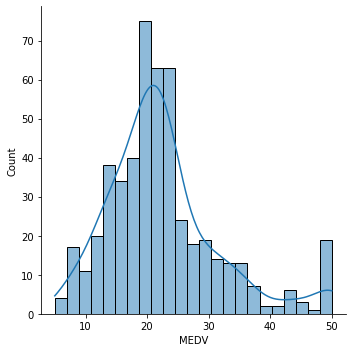

In [12]:
#let plot the distribution of our target (dependent) variable
sns.displot(data=df, x = "MEDV", kde= True)

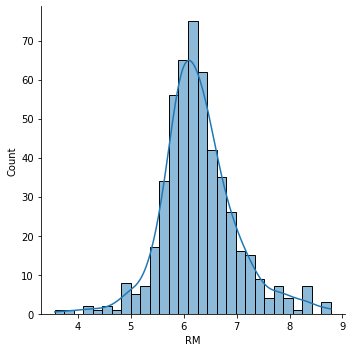

In [13]:
#let plot the distribution of our independent variable "RM"
sns.displot(data=df, x = "RM", kde= True)

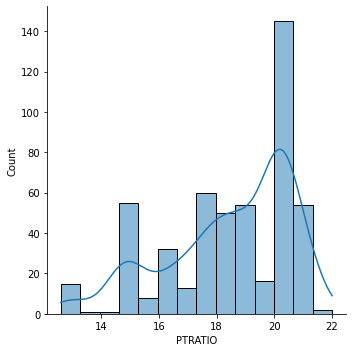

In [14]:
#let plot the distribution of our independent variable "PTRATIO"
sns.displot(data=df, x = "PTRATIO", kde= True)

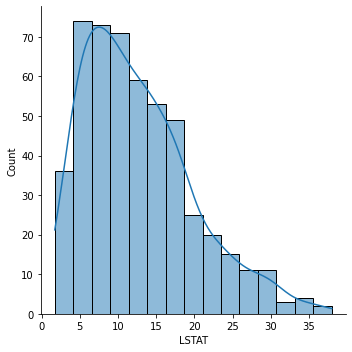

In [15]:
#let plot the distribution of our independent variable "LSTAT"
sns.displot(data=df, x = "LSTAT", kde= True)

Using a scatter plot let’s see how these features vary with MEDV.

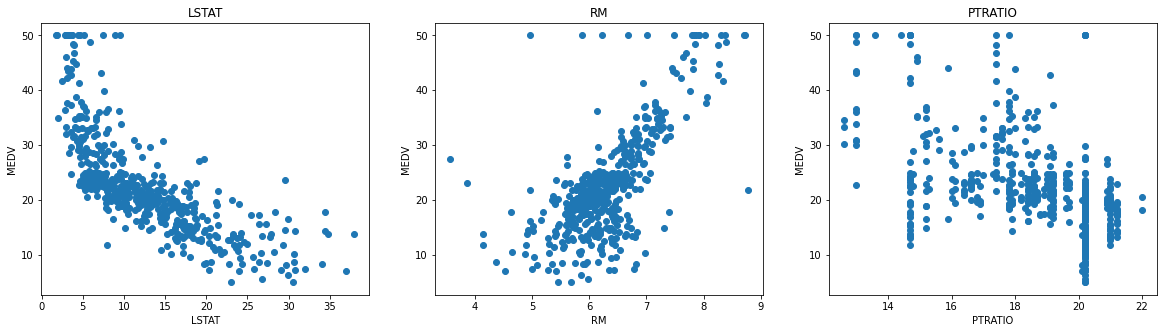

In [16]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Observations:
The prices increase as the value of RM increases linearly. The linear correlation is positive. There are few outliers.
The prices tend to decrease with an increase in LSTAT. The linear correlation is negative.It doesn’t look to be following exactly a linear line.


In [17]:
from sklearn import preprocessing

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsRobust = ['LSTAT', 'RM','PTRATIO','CRIM','ZN','B']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

------------------------

## Train and test split

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
#split features and target
features = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX',
             'PTRATIO','B','LSTAT']
X = df.loc[:, features]
y = df.loc[:, ['MEDV']]

In [20]:
#split train and test of features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


------------------

# Models

In [22]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [24]:
X_pred_lr = regressor_linear.predict(X_test)

In [25]:
X_pred_lr[0:10]

array([[24.88963777],
       [23.72141085],
       [29.36499868],
       [12.12238621],
       [21.44382254],
       [19.2834443 ],
       [20.49647539],
       [21.36099298],
       [18.8967118 ],
       [19.9280658 ]])

In [26]:
# R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

R2_score (train):  0.7730135569264234
R2_score (test):  0.5892223849182482
RMSE:  5.783509315085153


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()

regressor_rf.fit(X_train, y_train)

/var/folders/mr/9tqv_fgx5djgxccybpsbhz440000gn/T/ipykernel_3080/2760510352.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rf.fit(X_train, y_train)


RandomForestRegressor()

In [28]:
X_pred_rf = regressor_rf.predict(X_test)

In [29]:
X_pred_rf[0:10]

array([24.299, 27.824, 21.852, 10.861, 21.043, 20.638, 21.269, 19.994,
       20.306, 19.006])

In [30]:
# R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

R2_score (train):  0.9837035599218464
R2_score (test):  0.7639157811098514
RMSE:  4.384514731572077


### Decision Tree Regression

In [31]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
X_pred_dt = regressor_dt.predict(X_test)

In [33]:
X_pred_dt[0:5]

array([23.7, 20.8, 20.6, 19.1, 20.8])

In [34]:
# R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

R2_score (train):  1.0
R2_score (test):  0.6019035496385025
RMSE:  5.693537788494919


### Let see the internal validation data:

In [35]:
metrics = pd.DataFrame( data = [['Randon_Forest', r2_score_rf_train, r2_score_rf_test,rmse_rf],
                                  ['Linear_Regression', r2_score_linear_train, r2_score_linear_test,rmse_linear],
                                ['Decision_Tree',r2_score_dt_train,r2_score_dt_test,rmse_dt]],
                                  columns = ['Model', 'R2_Train','R2_Test', 'MSE'])
metrics.head()

,Model,R2_Train,R2_Test,MSE
0,Randon_Forest,0.983704,0.763916,4.384515
1,Linear_Regression,0.773014,0.589222,5.783509
2,Decision_Tree,1.000000,0.601904,5.693538


### Cross validation:

In [36]:
cv_dt = cross_val_score(regressor_dt, X = X_train, y = y_train, cv = 10)
cv_linear = cross_val_score(regressor_linear, X = X_train, y = y_train, cv = 10)
cv_rf = cross_val_score(regressor_rf, X = X_train, y = y_train, cv = 10)

print('CV_Decision Tree: ', cv_dt.mean())
print('CV_Linear Regression: ', cv_linear.mean())
print('CV_Random Forest: ', cv_rf.mean())

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages

CV_Decision Tree:  0.7576183280905073
CV_Linear Regression:  0.7310126345738172
CV_Random Forest:  0.8673742286842803


In [37]:
cv_dt = cross_val_score(regressor_dt, X , y , cv = 5)
cv_linear = cross_val_score(regressor_linear, X , y , cv = 5)
cv_rf = cross_val_score(regressor_rf, X, y , cv = 5)

print('CV: ', cv_dt.mean())
print('CV: ', cv_linear.mean())
print('CV: ', cv_rf.mean())

/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandychiereghin/opt/anaconda3/lib/python3.9/site-packages

CV:  0.26299282032234395
CV:  0.3532759243958795
CV:  0.6140361652537555


In [38]:
metrics.insert(4, "Cross_Validation", [cv_dt.mean(), cv_linear.mean(), cv_rf.mean()], True)
metrics.head()

,Model,R2_Train,R2_Test,MSE,Cross_Validation
0,Randon_Forest,0.983704,0.763916,4.384515,0.262993
1,Linear_Regression,0.773014,0.589222,5.783509,0.353276
2,Decision_Tree,1.000000,0.601904,5.693538,0.614036


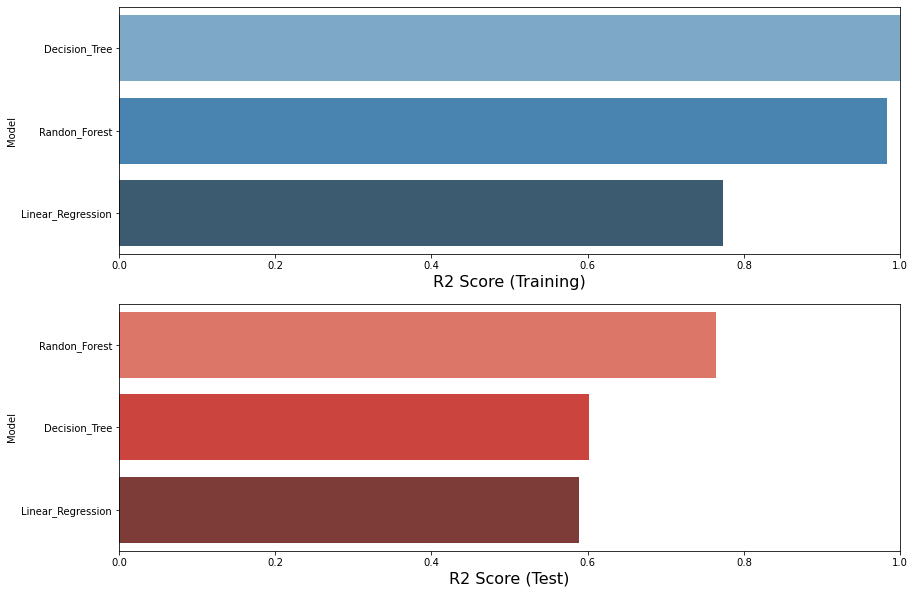

In [47]:
f, axes = plt.subplots(2,1, figsize=(14,10))

metrics.sort_values(by=['R2_Train'], ascending=False, inplace=True)

sns.barplot(x='R2_Train', y='Model', data = metrics, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

metrics.sort_values(by=['R2_Test'], ascending=False, inplace=True)

sns.barplot(x='R2_Test', y='Model', data = metrics, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

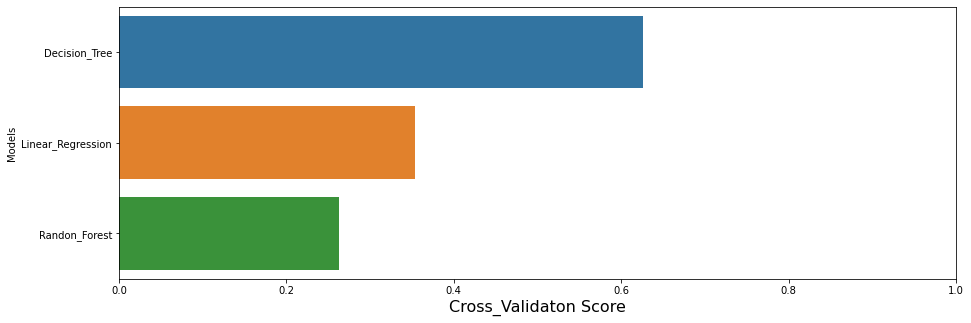

In [34]:
f, axe = plt.subplots(1,1, figsize=(15,5))

metrics.sort_values(by=['Cross_Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross_Validation', y='Model', data = metrics, ax = axe)
axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross_Validaton Score', size=16)
axe.set_ylabel('Models')
axe.set_xlim(0,1.0)
plt.show()


The Cross Validation an the internal validation test shows that the Decision Tree model generally gives good results.

## Repite the Decision Tree without the 'RM' variable:

In [35]:
#split features and target
features2 = ['CRIM', 'ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX',
             'PTRATIO','B','LSTAT']
X2 = df.loc[:, features2]
y2 = df.loc[:, ['MEDV']]

In [36]:
#split train and test of features and target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, train_size = .80)

In [37]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(404, 12)
(102, 12)
(404, 1)
(102, 1)


In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt2 = DecisionTreeRegressor(random_state = 0)
regressor_dt2.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=0)

In [50]:
# Predicting R2 Score the Train set results
y_pred_dt_train2 = regressor_dt2.predict(X_train2)
r2_score_dt_train2 = r2_score(y_train2, y_pred_dt_train2)

# Predicting R2 Score the Test set results
y_pred_dt_test2 = regressor_dt2.predict(X_test2)
r2_score_dt_test2 = r2_score(y_test2, y_pred_dt_test2)

# Predicting RMSE the Test set results
rmse_dt2 = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test2)))

# Cross validation
cv_dt_2 = cross_val_score(regressor_dt2, X , y , cv = 5)

print('R2_score (train): ', r2_score_dt_train2)
print('R2_score (test): ', r2_score_dt_test2)
print("RMSE: ", rmse_dt2)
print("CV_score: ", cv_dt_2.mean())

R2_score (train):  1.0
R2_score (test):  0.4556088501840243
RMSE:  6.6579968135038525
CV_score:  0.26299282032234395


In [40]:
metrics.loc[len(metrics)] = ['Decisio_Tree_withouth_RM', r2_score_dt_train2, r2_score_dt_test2,rmse_dt2,cv_dt_2.mean()]

metrics

,Model,R2_Train,R2_Test,MSE,Cross_Validation
2,Decision_Tree,1.000000,0.601904,5.693538,0.625924
1,Linear_Regression,0.773014,0.589222,5.783509,0.353276
0,Randon_Forest,0.983969,0.786002,4.174385,0.262993
3,Decisio_Tree_withouth_RM,1.000000,0.455609,6.657997,0.664178


After tremove the variable 'RM', we can observe that the Decision Tree model loss a bit its precision to get the result, how we can see from the table above.

#### References:

https://github.com/kennedykwangari/Kaggle-The-Boston-Housing-Dataset/blob/master/Kaggle%20The%20%20Boston%20Housing%20Dataset.ipynb

https://github.com/aina1997/MasterClassDS/blob/main/Introducci%C3%B3%20a%20la%20Intel%C2%B7lig%C3%A8ncia%20artificial/IA%20-%202.pdf

### Conclusions

1. It's important to avoid the selection of target variables, based only to the linear correlation, because probably there are variables that present a different type of correlation and can be importatn for determinate the results of the regression.

2. Presented the 3 different models we can observe that the best performer is the Decision Tree.

3. Keep the 'RM' is relevant for models to performing better.
